# Undestand all datasets

**Date**: 2025-11-15

**Author**: Raquel Marques

<br>

To enhance the clarity and organization of this project, please adhere to the following legend to better understand the logic and structure of the documentation:

Legend:
* <span style="color:green">Explanation</span>: Provides detailed reasoning or context for concepts and processes.
* <span style="color:purple">Tips</span>: Offers practical advice or best practices to improve efficiency or outcomes.
* <span style="color:red">Practice</span>: Highlights actionable steps or exercises to apply the concepts.
* <span style="color:blue">Business Context</span>: Connects the technical work to relevant business objectives or scenarios.

## <span style="color:green"> Libraries </span>

Libraries being used in this code.

In [63]:
## LIBRARY
import os
import pandas as pd
import datetime as dt

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

## <span style="color:green"> Import Data </span>

In [64]:
## PATH & OTHERS
# Project Directory
project_dir = os.path.join(os.path.expanduser("~"), "OneDrive", "Project_Code", "Project-DiseaseSymptom-Kaggle")


## IMPORT DATA
df_dataset = pd.read_csv(os.path.join(project_dir, "data/raw/", "dataset.csv"))
df_sympDesc = pd.read_csv(os.path.join(project_dir, "data/raw/", "symptom_Description.csv"))
df_sympPrec = pd.read_csv(os.path.join(project_dir, "data/raw/", "symptom_precaution.csv"))
df_sympSev = pd.read_csv(os.path.join(project_dir, "data/raw/", "Symptom-severity.csv"))

## <span style="color:green"> Function </span>

These functions will help us with the descriptive process of the work.

In [65]:
# Function: univariate_numeric_variable: Create relevant charts for univariated analysis on numeric variable.
def univariate_numeric_variable(data, variable):
    """
    Generates a matrix of charts (2x2) for a numeric continuous variable.

    [1,1] Histogram
    [1,2] Violin Plot
    [2,1] Box plot
    [2,2] Box plot with points overlaid

    Above the charts, shows a table with the variable descriptive statistics.

    Parameters:
        data (pd.DataFrame): Database containing the variable.
        variable (str): Name of the variable to be analysed.

    Returns:
        None

    Usage example:
        >> data = pd.DataFrame({"example_variable": np.random.normal(loc=50, scale=10, size=100)})
        >>univariate_numeric_variable(data, "example_variable")
        
    """
    
    # Calculate descriptive statistics
    desc_stats = data[variable].describe().to_frame().T
    desc_stats = desc_stats.round(4)  # Limit to 4 decimal places

    # Configuration of subplots
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle(f"Analysing: {variable}", fontsize=16, y=0.98)

    # Add table on the top
    ax_table = plt.subplot2grid((3, 2), (0, 0), colspan=2)
    ax_table.axis("off")
    table = ax_table.table(cellText=desc_stats.values,
                           colLabels=desc_stats.columns,
                           rowLabels=desc_stats.index,
                           cellLoc="center",
                           loc="center",
                           bbox=[0, 0, 1, 1]) 
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(desc_stats.columns))))

    # Add padding by scaling the table
    table.scale(1.2, 1.8)  # Adjust these values for horizontal/vertical padding

    # [1,1] Histogram
    ax1 = plt.subplot2grid((3, 2), (1, 0))
    sns.histplot(data[variable], kde=True, ax=ax1, color="skyblue")
    ax1.set_title("Histogram", fontsize=12)
    ax1.set_xlabel(variable)

    # [1,2] Violin Chart
    ax2 = plt.subplot2grid((3, 2), (1, 1), sharex=ax1)
    sns.violinplot(x=data[variable], ax=ax2, color="lightgreen")
    ax2.set_title("Violin Chart", fontsize=12)
    ax2.set_xlabel(variable)

    # [2,1] Box plot
    ax3 = plt.subplot2grid((3, 2), (2, 0), sharex=ax1)
    sns.boxplot(x=data[variable], ax=ax3, color="orange")
    ax3.set_title("Box plot", fontsize=12)
    ax3.set_xlabel(variable)

    # [2,2] Box plot with points overlaid
    ax4 = plt.subplot2grid((3, 2), (2, 1), sharex=ax1)
    sns.boxplot(x=data[variable], ax=ax4, color="lightcoral")
    sns.stripplot(x=data[variable], ax=ax4, color="black", alpha=0.5, jitter=True)
    ax4.set_title("Box plot with points", fontsize=12)
    ax4.set_xlabel(variable)

    # Final Adjustments
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [66]:
# Function: univariate_categorical_variable: Create relevant charts for univariated analysis on categorical variable.
def univariate_categorical_variable(data, variable):
    """
    Analyse categorical variable.

    1. Returns transposed describe function in a table format.
    2. Returns a table with level frequency (including percentage and total).
    3. Plot a bar chart with frequency and show values on top.

    Parameters:
        data (pd.DataFrame): Database containing the variable.
        variable (str): Name of the variable to be analysed.

    Returns:
        None

    Usage example:
        >>> import pandas as pd
        >>> df = pd.DataFrame({'Caregory': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'C', 'A', 'B']})
        >>> univariate_categorical_variable(df, 'Caregory')
    """
    # Verify if variable is on the dataframe
    if variable not in data.columns:
        raise ValueError(f"Variable '{variable}' is not in the DataFrame.")

    # 1. Transposed and formated describe
    describe_table = data[variable].describe().to_frame()
    describe_table = describe_table.T
    describe_table.index = [variable]

    # Show formated table
    print("Categorical variable describe:")
    display(describe_table)

    # 2. Frequency of each level (percentage and total)
    frequency_table = data[variable].value_counts().reset_index()
    frequency_table.columns = [variable, 'Frequency']
    frequency_table['Percentage (%)'] = (frequency_table['Frequency'] / len(data) * 100).round(2)

    # Add line for total
    total_row = pd.DataFrame({
        variable: ['Total'],
        'Frequency': [frequency_table['Frequency'].sum()],
        'Percentage (%)': [100.0]
    })
    frequency_table = pd.concat([frequency_table, total_row], ignore_index=True)

    # Show formated table
    print("Frequency table of categorical variable (with percentage and total):")
    display(frequency_table)

    # 3. Frequency bar chart
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=variable, y='Frequency', data=frequency_table[:-1], errorbar=None)

    # Add lables on top of the bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=7, color='black',
                    xytext=(0, 5), textcoords='offset points')

    # Configure chart
    plt.title(f'Frequency chart: {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



In [67]:
# Function: numeric_variable_analysis_percentile: Percentile analysis for one numeric variable.
def numeric_variable_analysis_percentile(data, x, y, q=10, chart='none'):
    """
    Sort variable x, divide in percentile and summarize.

    Paameters:
        data (pd.DataFrame): Database containing the variable.
        x (str): Name of the independent varaible.
        y (str): Name of dependent variable.
        q (int): Number of percentile (default: 10).
        chart (str): Chart options: 'p', 'logit', 'both', 'none' (default: 'none').

    Returns:
        pd.DataFrame: DataFrame with summarize statistics by percentile, incluindo:
                      - Percentile
                      - n (number of rows)
                      - Min x
                      - Max x
                      - p (mean y)
                      - logit p

    Usage example:
        >> data = pd.DataFrame({'x': np.random.uniform(0, 100, 1000), 
        'y': np.random.randint(0, 2, 1000)})
        >> result = numeric_variable_analysis_percentile(data, 'x', 'y', q=10, chart='both')
        >> print(result)
    """
    # Certify that y varaible is in a numeric format
    data[y] = pd.to_numeric(data[y], errors='coerce')

    # Sort dataframe by x variable
    data = data.sort_values(by=x).reset_index(drop=True)

    # Create percentiles
    data['percentile'] = pd.qcut(data[x], q=q, labels=[str(i) for i in range(1, q + 1)])

    # Summaraize statistics per percentile
    summary = data.groupby('percentile').agg(
        n=(x, 'count'),
        min_x=(x, 'min'),
        max_x=(x, 'max'),
        p=(y, 'mean')
    ).reset_index()

    # Calculate logit p
    summary['logit_p'] = np.log(summary['p'] / (1 - summary['p']))

    # Adjust to deal where p is 0 or 1
    epsilon = 1e-10  # smal value to adjust 0 e 1
    summary['logit_p'] = np.log(np.clip(summary['p'], epsilon, 1 - epsilon) / 
                                 (1 - np.clip(summary['p'], epsilon, 1 - epsilon)))


    # Chart option
    if chart in ['p', 'logit', 'both']:
        plt.figure(figsize=(8, 6))

        if chart == 'p':
            plt.scatter(summary['percentile'], summary['p'], color='blue')
            plt.title('Percentile chart x p')
            plt.xlabel('Percentile')
            plt.ylabel('p (average of y)')
            plt.grid(True)
            plt.show()

        elif chart == 'logit':
            plt.scatter(summary['percentile'], summary['logit_p'], color='red')
            plt.title('Percentile chart x logit p')
            plt.xlabel('Percentile')
            plt.ylabel('logit p')
            plt.grid(True)
            plt.show()

        elif chart == 'both':
            # Chart side-by-side
            fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

            # Percentile Chart x p
            axes[0].scatter(summary['percentile'], summary['p'], color='blue')
            axes[0].set_title('Percentile x p')
            axes[0].set_xlabel('Percentile')
            axes[0].set_ylabel('p (average of y)')
            axes[0].grid(True)

            # Percentile Chart x logit p
            axes[1].scatter(summary['percentile'], summary['logit_p'], color='red')
            axes[1].set_title('Percentile x logit p')
            axes[1].set_xlabel('Percentile')
            axes[1].set_ylabel('logit p')
            axes[1].grid(True)

            plt.tight_layout()
            plt.show()

    return summary

## <span style="color:green"> Exploratory Data Analysis (EDA) 1 </span>

Let's understand our data.



### <span style="color:green"> Table: Dataset </span>


- dataset.csv
    - Contains 4,920 records of disease and symptom combinations.
    - Every record has at least two symptoms (Symptom_1 and Symptom_2).
    - The table captures extensive symptom lists, though the number of symptoms per entry varies widely, with many entries having fewer than the maximum 17 symptoms. The NULL or missing values indicate that not all diseases present with a full list of 17 symptoms in every recorded instance.

In [68]:
## EDA - Univariable

### Dataset
df_dataset.info()

# Convert to lower case
df_dataset['Disease'] = df_dataset['Disease'].str.lower().str.strip()
df_dataset['Symptom_1'] = df_dataset['Symptom_1'].str.lower().str.strip()
df_dataset['Symptom_2'] = df_dataset['Symptom_2'].str.lower().str.strip()
df_dataset['Symptom_3'] = df_dataset['Symptom_3'].str.lower().str.strip()
df_dataset['Symptom_4'] = df_dataset['Symptom_4'].str.lower().str.strip()
df_dataset['Symptom_5'] = df_dataset['Symptom_5'].str.lower().str.strip()
df_dataset['Symptom_6'] = df_dataset['Symptom_6'].str.lower().str.strip()
df_dataset['Symptom_7'] = df_dataset['Symptom_7'].str.lower().str.strip()
df_dataset['Symptom_8'] = df_dataset['Symptom_8'].str.lower().str.strip()
df_dataset['Symptom_9'] = df_dataset['Symptom_9'].str.lower().str.strip()
df_dataset['Symptom_10'] = df_dataset['Symptom_10'].str.lower().str.strip()
df_dataset['Symptom_11'] = df_dataset['Symptom_11'].str.lower().str.strip()
df_dataset['Symptom_12'] = df_dataset['Symptom_12'].str.lower().str.strip()
df_dataset['Symptom_13'] = df_dataset['Symptom_13'].str.lower().str.strip()
df_dataset['Symptom_14'] = df_dataset['Symptom_14'].str.lower().str.strip()
df_dataset['Symptom_15'] = df_dataset['Symptom_15'].str.lower().str.strip()
df_dataset['Symptom_16'] = df_dataset['Symptom_16'].str.lower().str.strip()
df_dataset['Symptom_17'] = df_dataset['Symptom_17'].str.lower().str.strip()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


#### <span style="color:green"> Variable: Disease </span>

- There is 41 unique diseases.
- For each unique disease we have 120 observations, we can now assume each row is a patient with an identified disease and a set of symptoms.
- `Disease` can be our target variable, and we can use the `Symptom_##` columns as our features, that will help us identified the disease.

Categorical variable describe:


,count,unique,top,freq
Disease,4920,41,fungal infection,120


Frequency table of categorical variable (with percentage and total):


,Disease,Frequency,Percentage (%)
0,fungal infection,120,2.44
1,hepatitis c,120,2.44
2,hepatitis e,120,2.44
3,alcoholic hepatitis,120,2.44
4,tuberculosis,120,2.44
5,common cold,120,2.44
6,pneumonia,120,2.44
7,dimorphic hemmorhoids(piles),120,2.44
8,heart attack,120,2.44
9,varicose veins,120,2.44


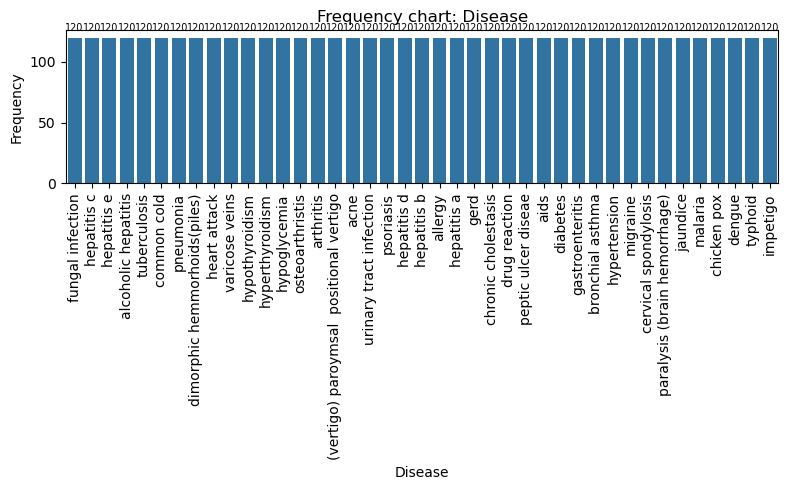

In [69]:
univariate_categorical_variable(data=df_dataset, variable='Disease')

#### <span style="color:green"> Variable: Symptom_1 </span>

- 34 distinct values.
- Top 3 are vomiting, fatigue and itching with 44.5% of the column values.

Categorical variable describe:


,count,unique,top,freq
Symptom_1,4920,34,vomiting,822


Frequency table of categorical variable (with percentage and total):


,Symptom_1,Frequency,Percentage (%)
0,vomiting,822,16.71
1,fatigue,690,14.02
2,itching,678,13.78
3,skin_rash,480,9.76
4,chills,474,9.63
5,joint_pain,462,9.39
6,continuous_sneezing,222,4.51
7,headache,126,2.56
8,acidity,120,2.44
9,stomach_pain,114,2.32


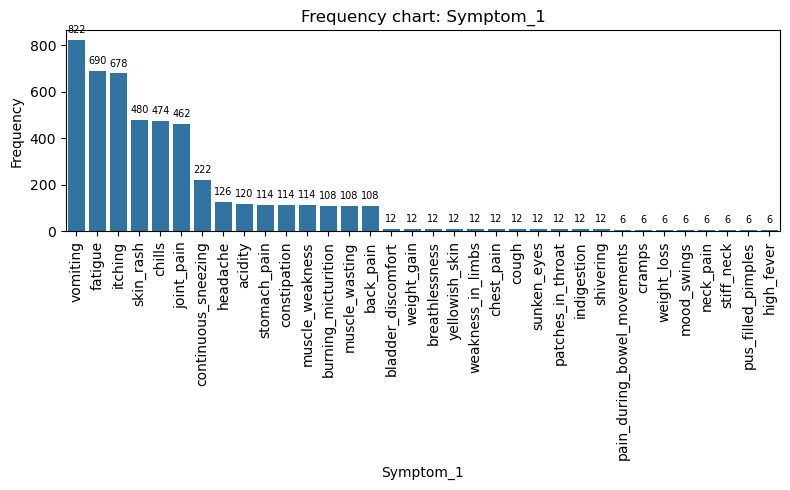

In [70]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_1')

#### <span style="color:green"> Variable: Symptom_2 </span>

- 48 distinct values.
- most frequent vomiting with 17.7% of the column values.

Categorical variable describe:


,count,unique,top,freq
Symptom_2,4920,48,vomiting,870


Frequency table of categorical variable (with percentage and total):


,Symptom_2,Frequency,Percentage (%)
0,vomiting,870,17.68
1,fatigue,402,8.17
2,skin_rash,306,6.22
3,chills,240,4.88
4,yellowish_skin,240,4.88
5,headache,216,4.39
6,indigestion,210,4.27
7,high_fever,156,3.17
8,neck_pain,132,2.68
9,weight_loss,120,2.44


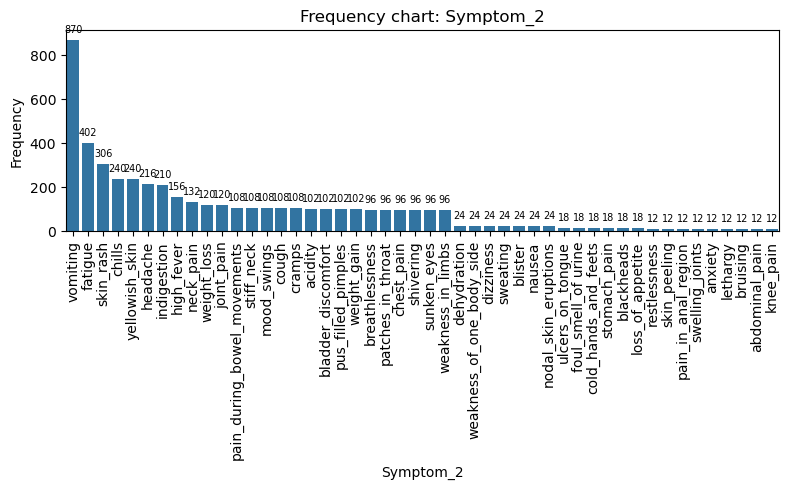

In [71]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_2')

#### <span style="color:green"> Variable: Symptom_3 </span>

- 54 distinct values.
- most frequent fatigue with 14.8% of the column values.

Categorical variable describe:


,count,unique,top,freq
Symptom_3,4920,54,fatigue,726


Frequency table of categorical variable (with percentage and total):


,Symptom_3,Frequency,Percentage (%)
0,fatigue,726,14.76
1,high_fever,324,6.59
2,yellowish_skin,240,4.88
3,nausea,222,4.51
4,lethargy,138,2.80
5,weight_loss,138,2.80
6,abdominal_pain,132,2.68
7,cough,120,2.44
8,sweating,120,2.44
9,restlessness,120,2.44


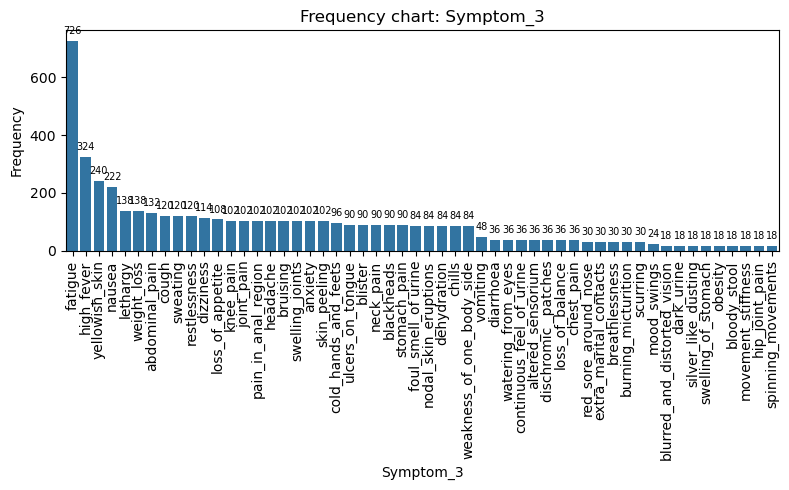

In [72]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_3')

#### <span style="color:green"> Variable: Symptom_4 </span>

- 50 distinct values.
- most frequent fatigue with 7.7% of the column values.
- 348 missing values (7%)

Categorical variable describe:


,count,unique,top,freq
Symptom_4,4572,50,high_fever,378


Frequency table of categorical variable (with percentage and total):


,Symptom_4,Frequency,Percentage (%)
0,high_fever,378,7.68
1,lethargy,222,4.51
2,sweating,216,4.39
3,yellowish_skin,216,4.39
4,weight_loss,192,3.90
5,vomiting,174,3.54
6,cough,162,3.29
7,loss_of_balance,144,2.93
8,dark_urine,144,2.93
9,nausea,120,2.44


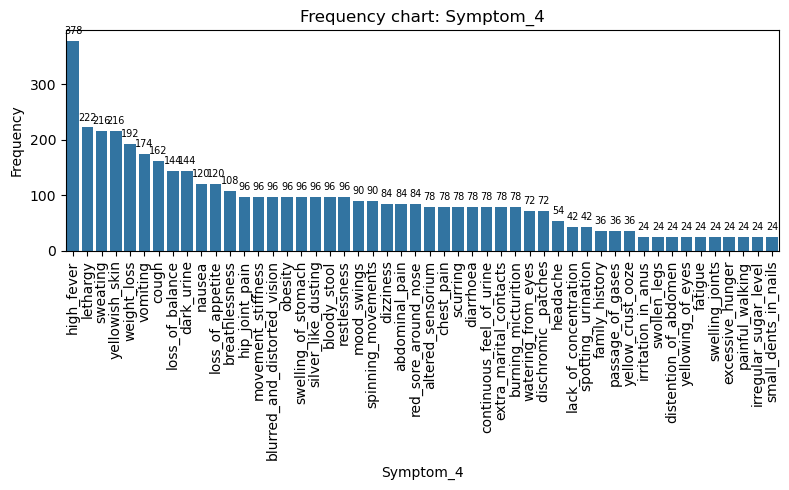

In [73]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_4')

#### <span style="color:green"> Variable: Symptom_5 </span>

- 38 distinct values.
- most frequent headache with 7% of the column values.
- 1,206 missing values (24.5%)

Categorical variable describe:


,count,unique,top,freq
Symptom_5,3714,38,headache,348


Frequency table of categorical variable (with percentage and total):


,Symptom_5,Frequency,Percentage (%)
0,headache,348,7.07
1,high_fever,330,6.71
2,dark_urine,210,4.27
3,nausea,192,3.90
4,cough,162,3.29
5,loss_of_balance,162,3.29
6,loss_of_appetite,150,3.05
7,sweating,120,2.44
8,painful_walking,120,2.44
9,yellowish_skin,120,2.44


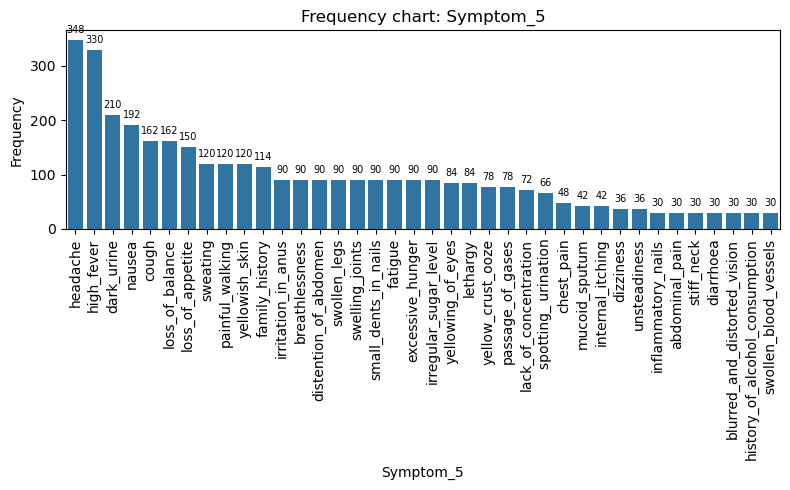

In [74]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_5')

#### <span style="color:green"> Variable: Symptom_6 </span>

- 32 distinct values.
- most frequent nausea with 7.9% of the column values.
- 1,986 missing values (40.3%)

Categorical variable describe:


,count,unique,top,freq
Symptom_6,2934,32,nausea,390


Frequency table of categorical variable (with percentage and total):


,Symptom_6,Frequency,Percentage (%)
0,nausea,390,7.93
1,loss_of_appetite,240,4.88
2,headache,204,4.15
3,high_fever,168,3.41
4,abdominal_pain,156,3.17
5,dark_urine,120,2.44
6,blurred_and_distorted_vision,120,2.44
7,diarrhoea,120,2.44
8,sweating,84,1.71
9,history_of_alcohol_consumption,84,1.71


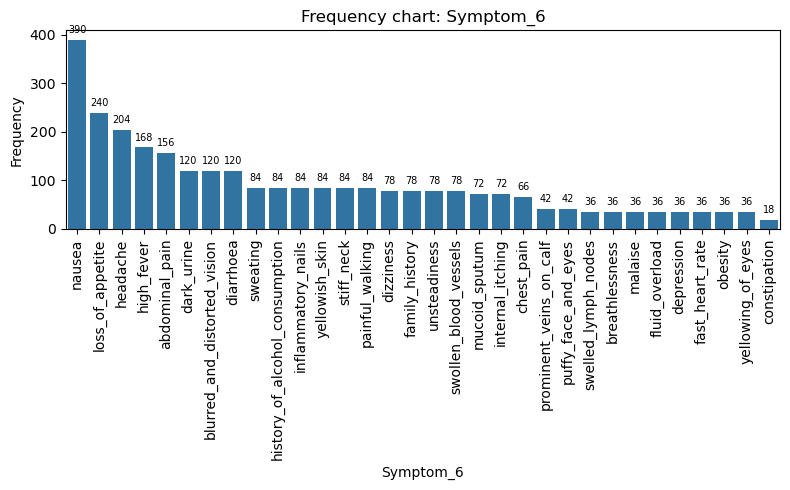

In [75]:
univariate_categorical_variable(data=df_dataset, variable='Symptom_6')

### <span style="color:green"> Table: Symptom Description </span>


- symptom_Description.csv
    - Contains 41 rows, each representing a unique disease and its corresponding description.
    - The table has complete data, with no missing values in either column.


In [76]:
### symptom_Description
df_sympDesc.info()

# Convert to lower
df_sympDesc['Disease'] = df_sympDesc['Disease'].str.lower()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes


#### <span style="color:green"> Variable: Disease </span>

- There are 41 unique diseases.
- Each row represents a disease and its description.

Categorical variable describe:


,count,unique,top,freq
Disease,41,41,drug reaction,1


Frequency table of categorical variable (with percentage and total):


,Disease,Frequency,Percentage (%)
0,drug reaction,1,2.44
1,urinary tract infection,1,2.44
2,aids,1,2.44
3,paralysis (brain hemorrhage),1,2.44
4,typhoid,1,2.44
5,hepatitis b,1,2.44
6,fungal infection,1,2.44
7,hepatitis c,1,2.44
8,migraine,1,2.44
9,bronchial asthma,1,2.44


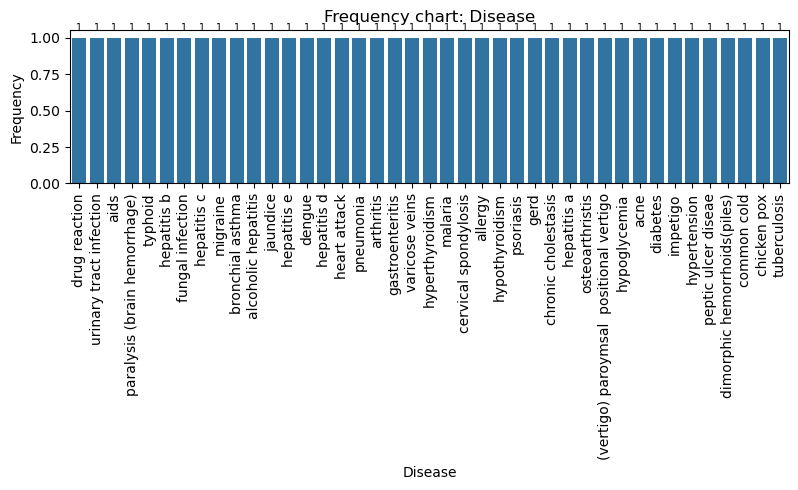

In [77]:
univariate_categorical_variable(data=df_sympDesc, variable='Disease')

### <span style="color:green"> Table: Symptom Precaution </span>

- symptom_precaution.csv
    - Each row represents a unique disease and its associated precautions.
    - The table structure allows for a maximum of four precautions per disease entry.
    - Data integrity shows most entries have at least two precautions, while one disease lacks a third or fourth precaution entry.

In [78]:
### symptom_precaution
df_sympPrec.info()

# Convert to lower
df_sympPrec['Disease'] = df_sympPrec['Disease'].str.lower().str.strip()
df_sympPrec['Precaution_1'] = df_sympPrec['Precaution_1'].str.lower().str.strip()
df_sympPrec['Precaution_2'] = df_sympPrec['Precaution_2'].str.lower().str.strip()
df_sympPrec['Precaution_3'] = df_sympPrec['Precaution_3'].str.lower().str.strip()
df_sympPrec['Precaution_4'] = df_sympPrec['Precaution_4'].str.lower().str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


#### <span style="color:green"> Variable: Disease </span>

- There are 41 unique diseases.
- Each row represents a disease and its precautions.

Categorical variable describe:


,count,unique,top,freq
Disease,41,41,drug reaction,1


Frequency table of categorical variable (with percentage and total):


,Disease,Frequency,Percentage (%)
0,drug reaction,1,2.44
1,urinary tract infection,1,2.44
2,aids,1,2.44
3,paralysis (brain hemorrhage),1,2.44
4,typhoid,1,2.44
5,hepatitis b,1,2.44
6,fungal infection,1,2.44
7,hepatitis c,1,2.44
8,migraine,1,2.44
9,bronchial asthma,1,2.44


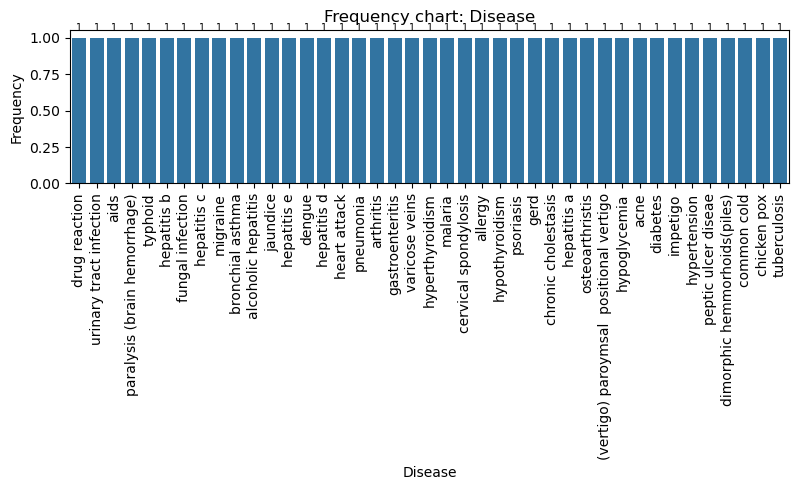

In [79]:
univariate_categorical_variable(data=df_sympPrec, variable='Disease')

#### <span style="color:green"> Variable: Precaution_1 </span>

- There are 32 unique precautions.

Categorical variable describe:


,count,unique,top,freq
Precaution_1,41,31,consult nearest hospital,4


Frequency table of categorical variable (with percentage and total):


,Precaution_1,Frequency,Percentage (%)
0,consult nearest hospital,4,9.76
1,avoid fatty spicy food,3,7.32
2,stop alcohol consumption,2,4.88
3,bath twice,2,4.88
4,meditation,2,4.88
5,consult doctor,2,4.88
6,drink plenty of water,2,4.88
7,avoid open cuts,1,2.44
8,massage,1,2.44
9,eat high calorie vegitables,1,2.44


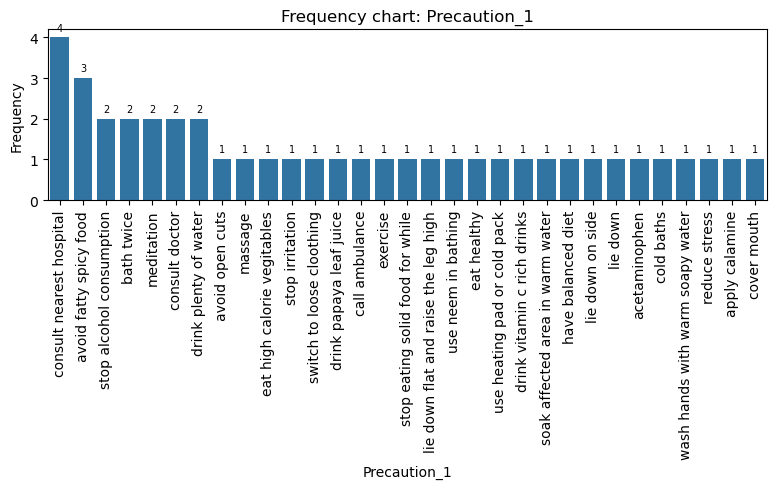

In [80]:
univariate_categorical_variable(data=df_sympPrec, variable='Precaution_1')

#### <span style="color:green"> Variable: Precaution_2 </span>

- There are 34 unique precautions.

Categorical variable describe:


,count,unique,top,freq
Precaution_2,41,34,exercise,3


Frequency table of categorical variable (with percentage and total):


,Precaution_2,Frequency,Percentage (%)
0,exercise,3,7.32
1,consult nearest hospital,2,4.88
2,medication,2,4.88
3,vaccination,2,4.88
4,consult doctor,2,4.88
5,avoid fatty spicy food,2,4.88
6,reduce stress,1,2.44
7,wear ppe if possible,1,2.44
8,eat healthy,1,2.44
9,antiboitic therapy,1,2.44


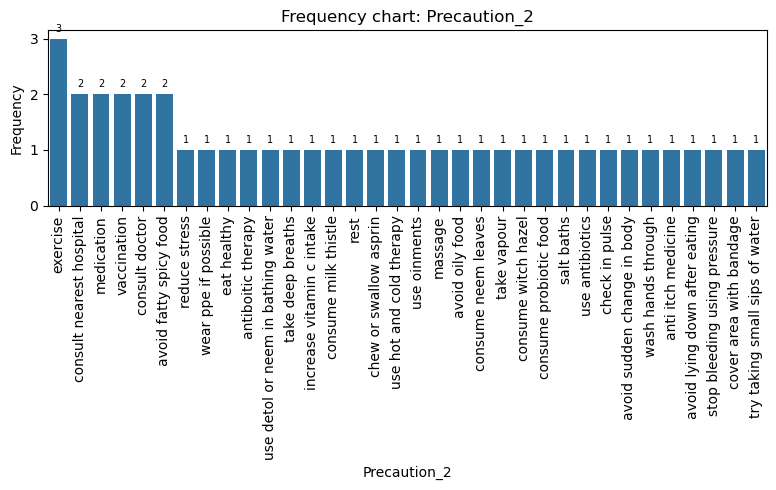

In [81]:
univariate_categorical_variable(data=df_sympPrec, variable='Precaution_2')

#### <span style="color:green"> Variable: Precaution_3 </span>

- There are 30 unique precautions.
- There is 1 missing value.

Categorical variable describe:


,count,unique,top,freq
Precaution_3,40,30,consult doctor,6


Frequency table of categorical variable (with percentage and total):


,Precaution_3,Frequency,Percentage (%)
0,consult doctor,6,14.63
1,eat healthy,4,9.76
2,rest,2,4.88
3,medication,2,4.88
4,stop taking drug,1,2.44
5,take otc pain reliver,1,2.44
6,keep calm,1,2.44
7,keep mosquitos away,1,2.44
8,eat fruits and high fiberous food,1,2.44
9,get away from trigger,1,2.44


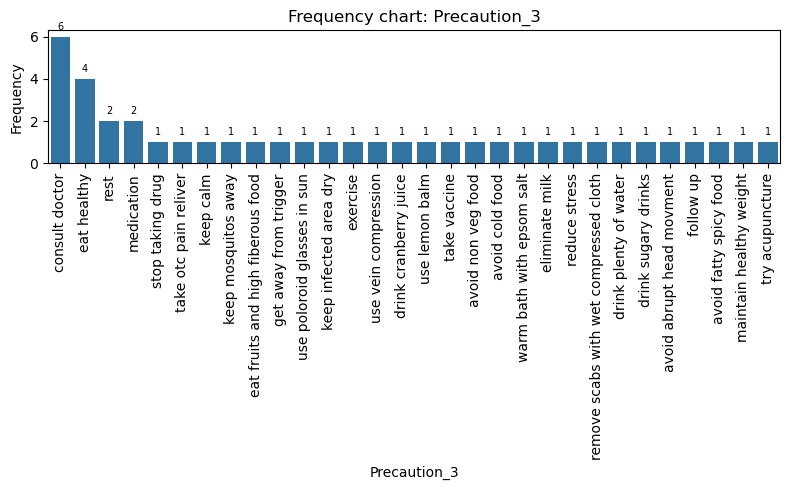

In [82]:
univariate_categorical_variable(data=df_sympPrec, variable='Precaution_3')

#### <span style="color:green"> Variable: Precaution_4 </span>

- There are 24 unique precautions.
- There is 1 missing value.

Categorical variable describe:


,count,unique,top,freq
Precaution_4,40,24,follow up,6


Frequency table of categorical variable (with percentage and total):


,Precaution_4,Frequency,Percentage (%)
0,follow up,6,14.63
1,medication,6,14.63
2,consult doctor,5,12.20
3,get proper sleep,2,4.88
4,salt baths,2,4.88
5,avoid public places,1,2.44
6,ease back into eating,1,2.44
7,massage,1,2.44
8,keep hydrated,1,2.44
9,seek help,1,2.44


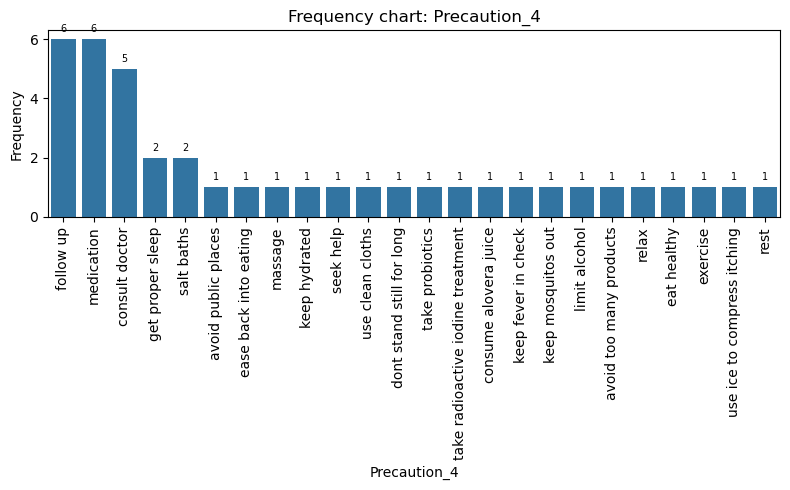

In [83]:
univariate_categorical_variable(data=df_sympPrec, variable='Precaution_4')

### <span style="color:green"> Table: Symptom Severity </span>

- Symptom-severity.csv
    - Each row represents a unique symptom.
    - The weight column is a measure of a symptom's impact or importance, quantified for analysis.
    - The values in the weight column are assessed every 2 days, based on the provided context. 

In [84]:
### Symptom-severity
df_sympSev.info()

# Convert to lower case
df_sympSev['Symptom'] = df_sympSev['Symptom'].str.lower().str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


#### <span style="color:green"> Variable: Symptom </span>

- There are 132 unique precautions.
- "fluid_overload" is the only one that repeats it self.
    - Need to check why it repeats, if the weight value is the sama or not and how can we fix it.

Categorical variable describe:


,count,unique,top,freq
Symptom,133,132,fluid_overload,2


Frequency table of categorical variable (with percentage and total):


,Symptom,Frequency,Percentage (%)
0,fluid_overload,2,1.50
1,itching,1,0.75
2,spinning_movements,1,0.75
3,muscle_pain,1,0.75
4,irritability,1,0.75
...,...,...,...
128,back_pain,1,0.75
129,pain_behind_the_eyes,1,0.75
130,loss_of_appetite,1,0.75
131,prognosis,1,0.75


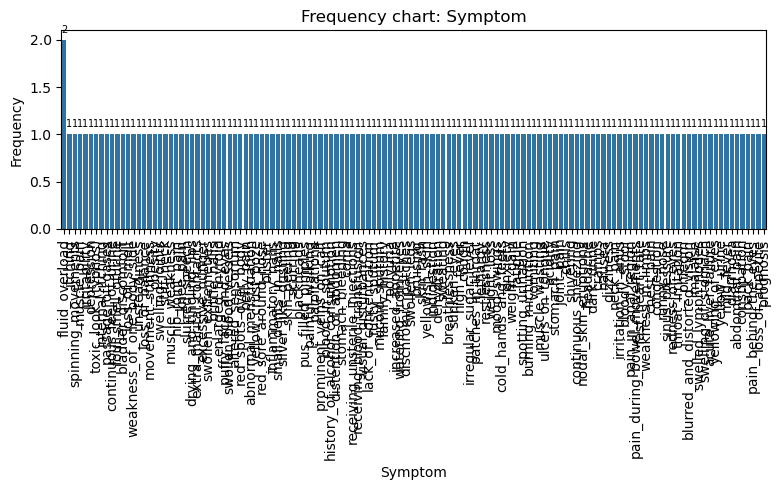

In [85]:
univariate_categorical_variable(data=df_sympSev, variable='Symptom')

#### <span style="color:green"> Variable: Weight </span>

- integers
- Min = 1
- Max = 7
- Avg = 4.2 and Median = 4, with this one a lot close, it looks like we have a normal distribution.

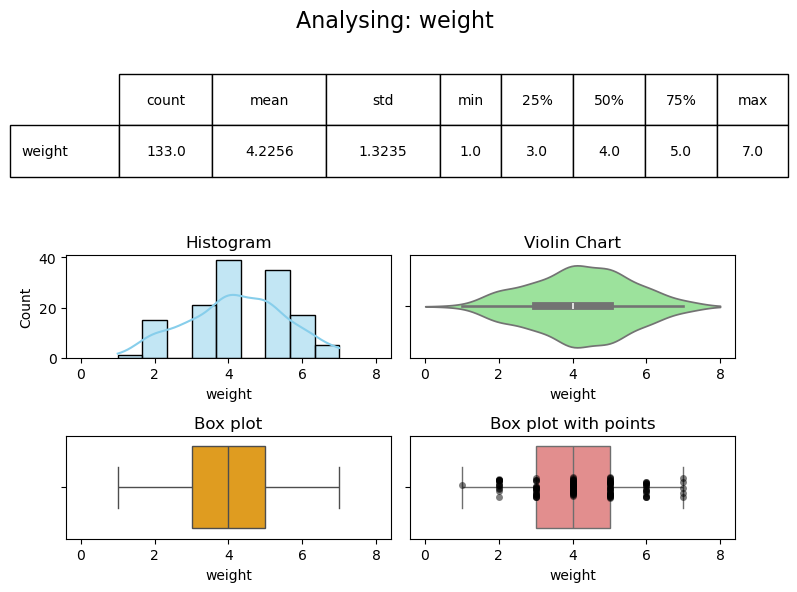

In [86]:
univariate_numeric_variable(data=df_sympSev, variable='weight')

### <span style="color:green"> Check Weight for the Symptom that repeats </span>

- We have 2 different values for "fluid_overload" in the Severity table, one with weight = 6 and another with weight = 4.
- There is no other way to differentiate when is one or the other, like being on the first 5 symptons for example.
- _For the purpuse of this anslysis we will modify this weight and use the maximum numbers, as we are dealing with diseases, assuming it is worse and check is better than leave it lower._


In [87]:
df_sympSev[df_sympSev['Symptom'] == "fluid_overload"]

,Symptom,weight
45,fluid_overload,6
117,fluid_overload,4


### <span style="color:purple"> Notes 1: Initial Analysis </span>

Foundings so far:
- **Dataset** table: contains 4,920 records of disease and symptom combinations.
    - We can think as each row as a patient, symptoms are features and disease as target.
    - Order of the symptom does not matter. The strategy will be create a variable for each symptom.

- **Symptom** table: contains 41 records representing each disease and its description.
    - More of descriptive table.
    - Need to check if we have descrisption for all diseases in the other datasets.

- **Precaution** table: contains 41 records representing each disease and up to 4 ways to prevent it.
    - Order of the precaution does not matter. The strategy will be create a variable for each precaution.

- **Severity** table: contains 133 records representing each symptom and thei severity weight.
    - "fluid_overload" has a duplicate record with 2 different weights.
        - Modify its weight to the maximum between the 2 records.
        - We are evaluating what would be worse, weight it down and it is actually worseor weight it higher and it is actually lower. Thinking this way, assuming the maximum might be better.



## <span style="color:green"> Transformations </span>

Let's create the dummy variables for symptoms and precaution.

### <span style="color:green"> Symptoms </span>

- Create an ID just for tracking.
- Group all Symptoms columns to the the unique of all 17 columns on dataset table.
- Create dummies for each symptom.
- Remove Symptom_1, ..., Symptom_17 columns.

In [115]:
df_dataset_adj = df_dataset.copy()

# Create ID column
df_dataset_adj['ID'] = range(1, len(df_dataset_adj) + 1)

In [116]:
# Symptoms
# Group all Symptoms columns to the the unique of all 17 columns on dataset table.

# List of symptom column names
symptom_columns_list = [f'Symptom_{i}' for i in range(1, 18)]

# The concat function combines them vertically (along axis 0)
all_symptoms_series = pd.concat([df_dataset_adj[col] for col in symptom_columns_list]).dropna()

# Get the unique values from the combined Series
all_symptoms = all_symptoms_series.unique()

all_symptoms = np.sort(all_symptoms)

print(f"Total unique symptoms found: {len(all_symptoms)}")
# print(all_symptoms)


Total unique symptoms found: 131


In [117]:
# Create a new DataFrame with all symptom columns initialized to 0
symptom_columns_df = pd.DataFrame(0, index=df_dataset_adj.index, columns=all_symptoms)

# Concatenate with original dataset
df_dataset_adj = pd.concat([df_dataset_adj, symptom_columns_df], axis=1)

# Check if each symptom exists in any of the 17 columns for each row
for symptom in all_symptoms:
    # Create a mask where the symptom appears in any of the 17 columns
    mask = df_dataset_adj[symptom_columns_list].isin([symptom]).any(axis=1)
    df_dataset_adj.loc[mask, symptom] = 1

print(f"Created {len(all_symptoms)} symptom dummy columns")



Created 131 symptom dummy columns


In [119]:
# Delete Symptom columns
df_dataset_adj = df_dataset_adj.drop(symptom_columns_list, axis=1)


### <span style="color:green"> Precautions </span>

- Group all Precaution columns to the the unique of all 4 columns.
- Create dummies for each precaution.
- Remove Precaution_1, ..., Precaution_4 columns.

In [123]:
df_sympPrec_adj = df_sympPrec.copy()

# Precaution
# Group all precaution columns to the the unique of all 4 columns.

# List of precaution column names
precautions_columns_list = [f'Precaution_{i}' for i in range(1, 5)]

# The concat function combines them vertically (along axis 0)
all_precautions_series = pd.concat([df_sympPrec_adj[col] for col in precautions_columns_list]).dropna()

# Get the unique values from the combined Series
all_precautions = all_precautions_series.unique()

all_precautions = np.sort(all_precautions)

print(f"Total unique precaution found: {len(all_precautions)}")
# print(all_precautions)




Total unique precaution found: 96


In [124]:
# Create a new DataFrame with all precaution columns initialized to 0
precaution_columns_df = pd.DataFrame(0, index=df_sympPrec_adj.index, columns=all_precautions)

# Concatenate with original dataset
df_sympPrec_adj = pd.concat([df_sympPrec_adj, precaution_columns_df], axis=1)

# Check if each precaution exists in any of the columns for each row
for precaution in all_precautions:
    # Create a mask where the precaution appears in any of the columns
    mask = df_sympPrec_adj[precautions_columns_list].isin([precaution]).any(axis=1)
    df_sympPrec_adj.loc[mask, precaution] = 1

print(f"Created {len(all_precautions)} precaution dummy columns")

Created 96 precaution dummy columns


In [125]:
# Delete precaution columns
df_sympPrec_adj = df_sympPrec_adj.drop(precautions_columns_list, axis=1)